# 第２章 線形回帰モデル

## Abstract
本章では線形回帰モデルを通じてモデリングの基礎概念について述べる。

* モデリング：モデルの想定 → モデルのパラメータ推定 → モデルの評価と選択 のモデルの構築の一連のプロセスのこと
* 回帰モデル：現象の結果とそれに影響を及ぼすと考えられる複数の要因とを結ぶつけるモデル

## 2変数間の関係を捉える
### データとモデル

#### データ：バネに加えた力とバネの長さ

In [84]:
import pandas as pd
data = pd.DataFrame({
        "weight" : [i for i in range(5,55,5)],
        "length" : [5.4, 5.7, 6.9, 6.4, 8.2, 7.7, 8.4, 10.1, 9.9, 10.5]
    })
data

,length,weight
0,5.4,5
1,5.7,10
2,6.9,15
3,6.4,20
4,8.2,25
5,7.7,30
6,8.4,35
7,10.1,40
8,9.9,45
9,10.5,50


#### モデル
##### 線形モデル
$$
y = u(x) + \beta_0 + \beta_1 x
$$

ここに誤差の影響を考慮すると。
##### 線形回帰モデル
$$
y_i = u(x) + \beta_0 + \beta_1 x_i + \epsilon_i
$$

### モデルの推定

#### 最小二乗法
各実験点での誤差の二条派を最初にするように回帰係数の値を決定する方法<br>

誤差の二乗和 $$S(\beta_0, \beta_1) \equiv \sum_{i=1}^{n} \{y_i - (\beta_0 + \beta_1 x_i)\}^2$$
を最小にする回帰係数を求める。<br>
実際、上の式を$$\beta_0,\beta_1$$に対して偏微分した式を0とおくことで最小二乗推定値$$\hat\beta_0,\hat\beta_1$$が求める。

In [85]:
# SymPy は Python の代数計算ライブラリです.
from sympy import *
init_session()

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [86]:
b0, b1 = symbols("b0 b1")

j = (y - (b1 * x + b0)) ** 2

In [87]:
j_b0 = diff(j, b0)

In [88]:
j_b1 = diff(j, b1)

In [103]:
sum_b0 = sum([j_b0.subs([(x, point[1]["weight"]), (y, point[1]["length"])]) for point in data.iterrows()]) / 2.
sum_b1 = sum([j_b1.subs([(x, point[1]["weight"]), (y, point[1]["length"])]) for point in data.iterrows()]) / 2.

In [104]:
solve([sum_b0, sum_b1], [b0, b1])

Plotすると、

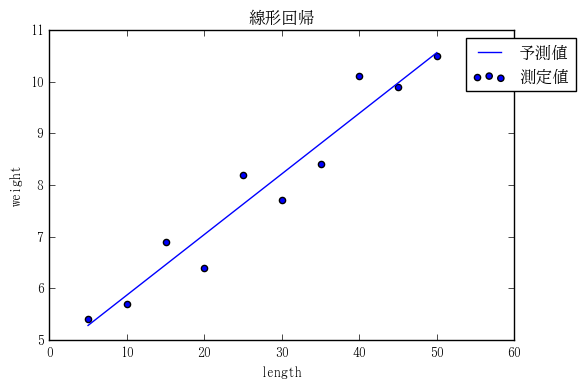

In [144]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data["weight"], [4.693333333333 + 0.1173333333333*expected for expected in list(data["weight"])], label='予測値')
plt.scatter(data["weight"], data["length"], label='測定値')
plt.title('線形回帰')
plt.ylabel('weight')
plt.xlabel('length')
plt.legend(bbox_to_anchor=(1.15, 1.0))
plt.show()

#### 最尤法
